<a href="https://colab.research.google.com/github/KUNALKEDARI20/Reliance-Stock-Price-Forecasting/blob/main/PROJECT_%3E1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [40]:
reliance=pd.read_csv('/content/RELIANCE.NS.csv',parse_dates=['Date']) #parse date helps to recognize Date column as datetime object
reliance  #Time series data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,33.917892,35.945827,33.917892,35.945827,26.684866,31204789.0
1,2000-01-04,36.902668,38.823490,35.888702,38.823490,28.821142,66436055.0
2,2000-01-05,36.652744,41.115627,36.652744,40.344440,29.950235,187894923.0
3,2000-01-06,41.272720,42.943623,41.272720,42.036766,31.206556,109810562.0
4,2000-01-07,42.129593,45.399994,41.843967,44.921570,33.348133,139140630.0
...,...,...,...,...,...,...,...
6074,2024-04-23,2958.000000,2987.000000,2911.100098,2918.649902,2918.649902,7302777.0
6075,2024-04-24,2927.000000,2937.100098,2899.000000,2900.350098,2900.350098,5231388.0
6076,2024-04-25,2885.000000,2935.949951,2883.000000,2919.949951,2919.949951,7971963.0
6077,2024-04-26,2927.899902,2930.000000,2900.000000,2905.100098,2905.100098,4706924.0


**Date:**The date of the trading day.  
**Open:**The price at which the stock opened for trading at the beginning of the trading day.  
**High:**The highest price of the stock reached during the trading day.  
**Low:**The lowest price of the stock reached during the trading day.  
**Close:** The price at which the stock closed at the end of the trading day.  
**Adj Close:** The adjusted closing price of the stock, which accounts for any corporate actions such as dividends, stock splits, or mergers. This price is adjusted to reflect the true value of the stock after these events.  
**Volume:**The total number of shares traded on that trading day, indicating the level of market activity.







#EDA=Exoplatary Data Analysis

In [41]:
reliance.info()#There are 10 observations which are null values(missing values)in all columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6079 entries, 0 to 6078
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       6079 non-null   datetime64[ns]
 1   Open       6069 non-null   float64       
 2   High       6069 non-null   float64       
 3   Low        6069 non-null   float64       
 4   Close      6069 non-null   float64       
 5   Adj Close  6069 non-null   float64       
 6   Volume     6069 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 332.6 KB


**1.Set Index -Date**

In [42]:
reliance.set_index('Date',inplace=True)
reliance.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,33.917892,35.945827,33.917892,35.945827,26.684866,31204789.0
2000-01-04,36.902668,38.823490,35.888702,38.823490,28.821142,66436055.0
2000-01-05,36.652744,41.115627,36.652744,40.344440,29.950235,187894923.0
2000-01-06,41.272720,42.943623,41.272720,42.036766,31.206556,109810562.0
2000-01-07,42.129593,45.399994,41.843967,44.921570,33.348133,139140630.0


**2.Missing Value and Imputation**

In [43]:
reliance.isnull().sum()

Open         10
High         10
Low          10
Close        10
Adj Close    10
Volume       10
dtype: int64

In [44]:
#Extracting the rows that contain null values in dataset
missing_rows=reliance[reliance.isnull().any(axis=1)]
missing_rows

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2003-04-14,NaN,NaN,NaN,NaN,NaN,NaN
2004-04-26,NaN,NaN,NaN,NaN,NaN,NaN
2004-10-13,NaN,NaN,NaN,NaN,NaN,NaN
2010-02-06,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-07,NaN,NaN,NaN,NaN,NaN,NaN
2012-03-03,NaN,NaN,NaN,NaN,NaN,NaN
2012-09-08,NaN,NaN,NaN,NaN,NaN,NaN
2012-11-11,NaN,NaN,NaN,NaN,NaN,NaN
2014-03-22,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
#As the row contains more than 5 missing values it can be deleted from data set
#mean=reliance.mean()
#mean
reliance_df=reliance.dropna(thresh=6) #drop rows that contain less than 6 null values
reliance_df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,33.917892,35.945827,33.917892,35.945827,26.684866,31204789.0
2000-01-04,36.902668,38.823490,35.888702,38.823490,28.821142,66436055.0
2000-01-05,36.652744,41.115627,36.652744,40.344440,29.950235,187894923.0
2000-01-06,41.272720,42.943623,41.272720,42.036766,31.206556,109810562.0
2000-01-07,42.129593,45.399994,41.843967,44.921570,33.348133,139140630.0
...,...,...,...,...,...,...
2024-04-23,2958.000000,2987.000000,2911.100098,2918.649902,2918.649902,7302777.0
2024-04-24,2927.000000,2937.100098,2899.000000,2900.350098,2900.350098,5231388.0
2024-04-25,2885.000000,2935.949951,2883.000000,2919.949951,2919.949951,7971963.0


In [46]:
reliance_df.shape

(6069, 6)

In [47]:
reliance_df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,6069.000000,6069.000000,6069.000000,6069.000000,6069.000000,6.069000e+03
mean,689.282224,697.132526,680.887468,688.717071,665.596257,1.759492e+07
std,744.042341,751.140627,736.631838,743.652502,746.829061,1.927247e+07
min,29.347902,31.347273,28.155420,29.019436,21.542969,0.000000e+00
25%,114.392555,116.963173,113.971260,115.435089,100.121124,6.592663e+06
50%,431.793610,437.051025,425.621887,431.610748,396.301300,1.052491e+07
75%,852.798096,861.164246,843.151917,851.518066,828.857910,2.120097e+07
max,3011.550049,3024.899902,2974.449951,3014.800049,3014.800049,3.161448e+08


**3.Duplicates**

In [48]:
reliance_df[reliance_df.duplicated()].shape # 0 duplicate rows

(1, 6)

#Visualization

#Subplot

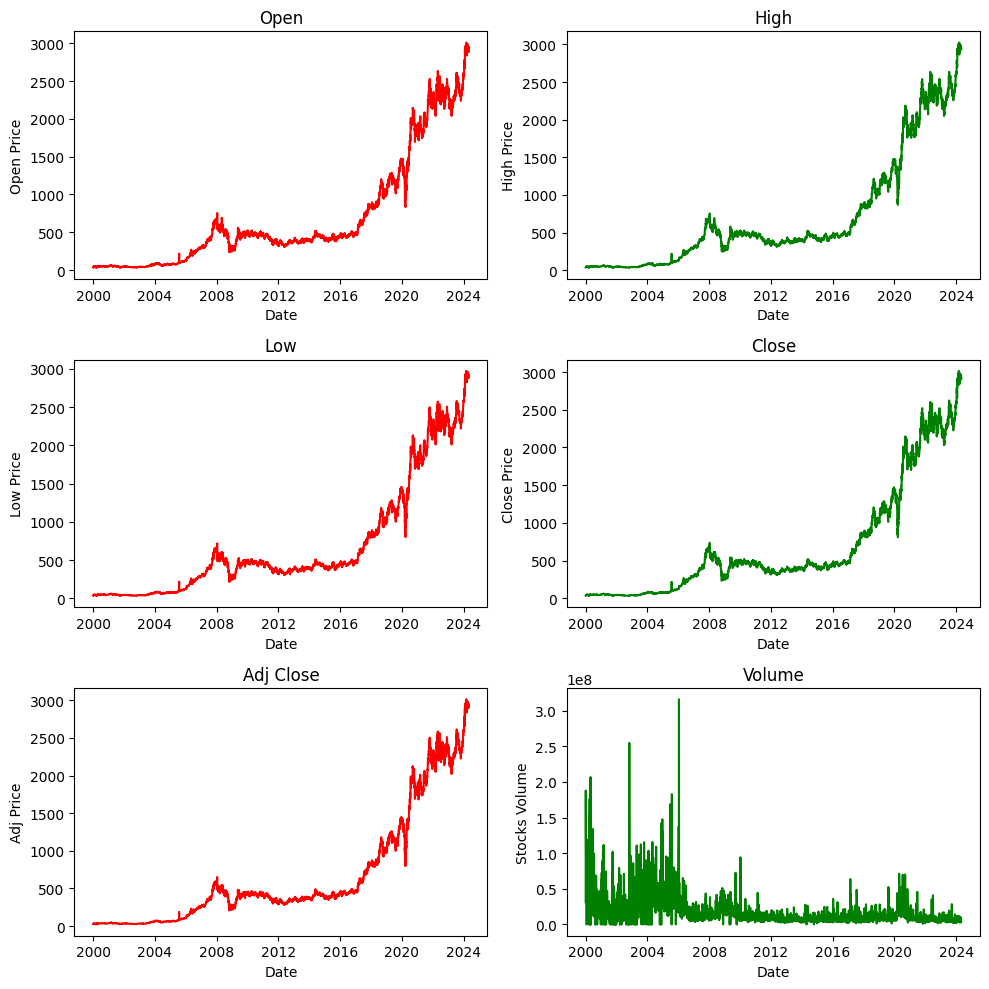

In [49]:
#Subplot
plt.figure(figsize=(10,10))
# Create the first subplot
plt.subplot(3, 2, 1)
plt.plot(reliance_df['Open'],color='red')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.title('Open')

# Create the second subplot
plt.subplot(3, 2, 2)
plt.plot(reliance_df['High'],color='green')
plt.xlabel('Date')
plt.ylabel('High Price')
plt.title('High')

# Create the third subplot
plt.subplot(3, 2, 3)
plt.plot(reliance_df['Low'],color='red')
plt.xlabel('Date')
plt.ylabel('Low Price')
plt.title('Low')

# Create the fourth subplot
plt.subplot(3, 2, 4)
plt.plot(reliance_df['Close'],color='green')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close')

# Create the fifth subplot
plt.subplot(3, 2, 5)
plt.plot(reliance_df['Adj Close'],color='red')
plt.xlabel('Date')
plt.ylabel('Adj Price')
plt.title('Adj Close')

# Create the sixth subplot
plt.subplot(3, 2, 6)
plt.plot(reliance_df['Volume'],color='green')
plt.xlabel('Date')
plt.ylabel('Stocks Volume')
plt.title('Volume')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()


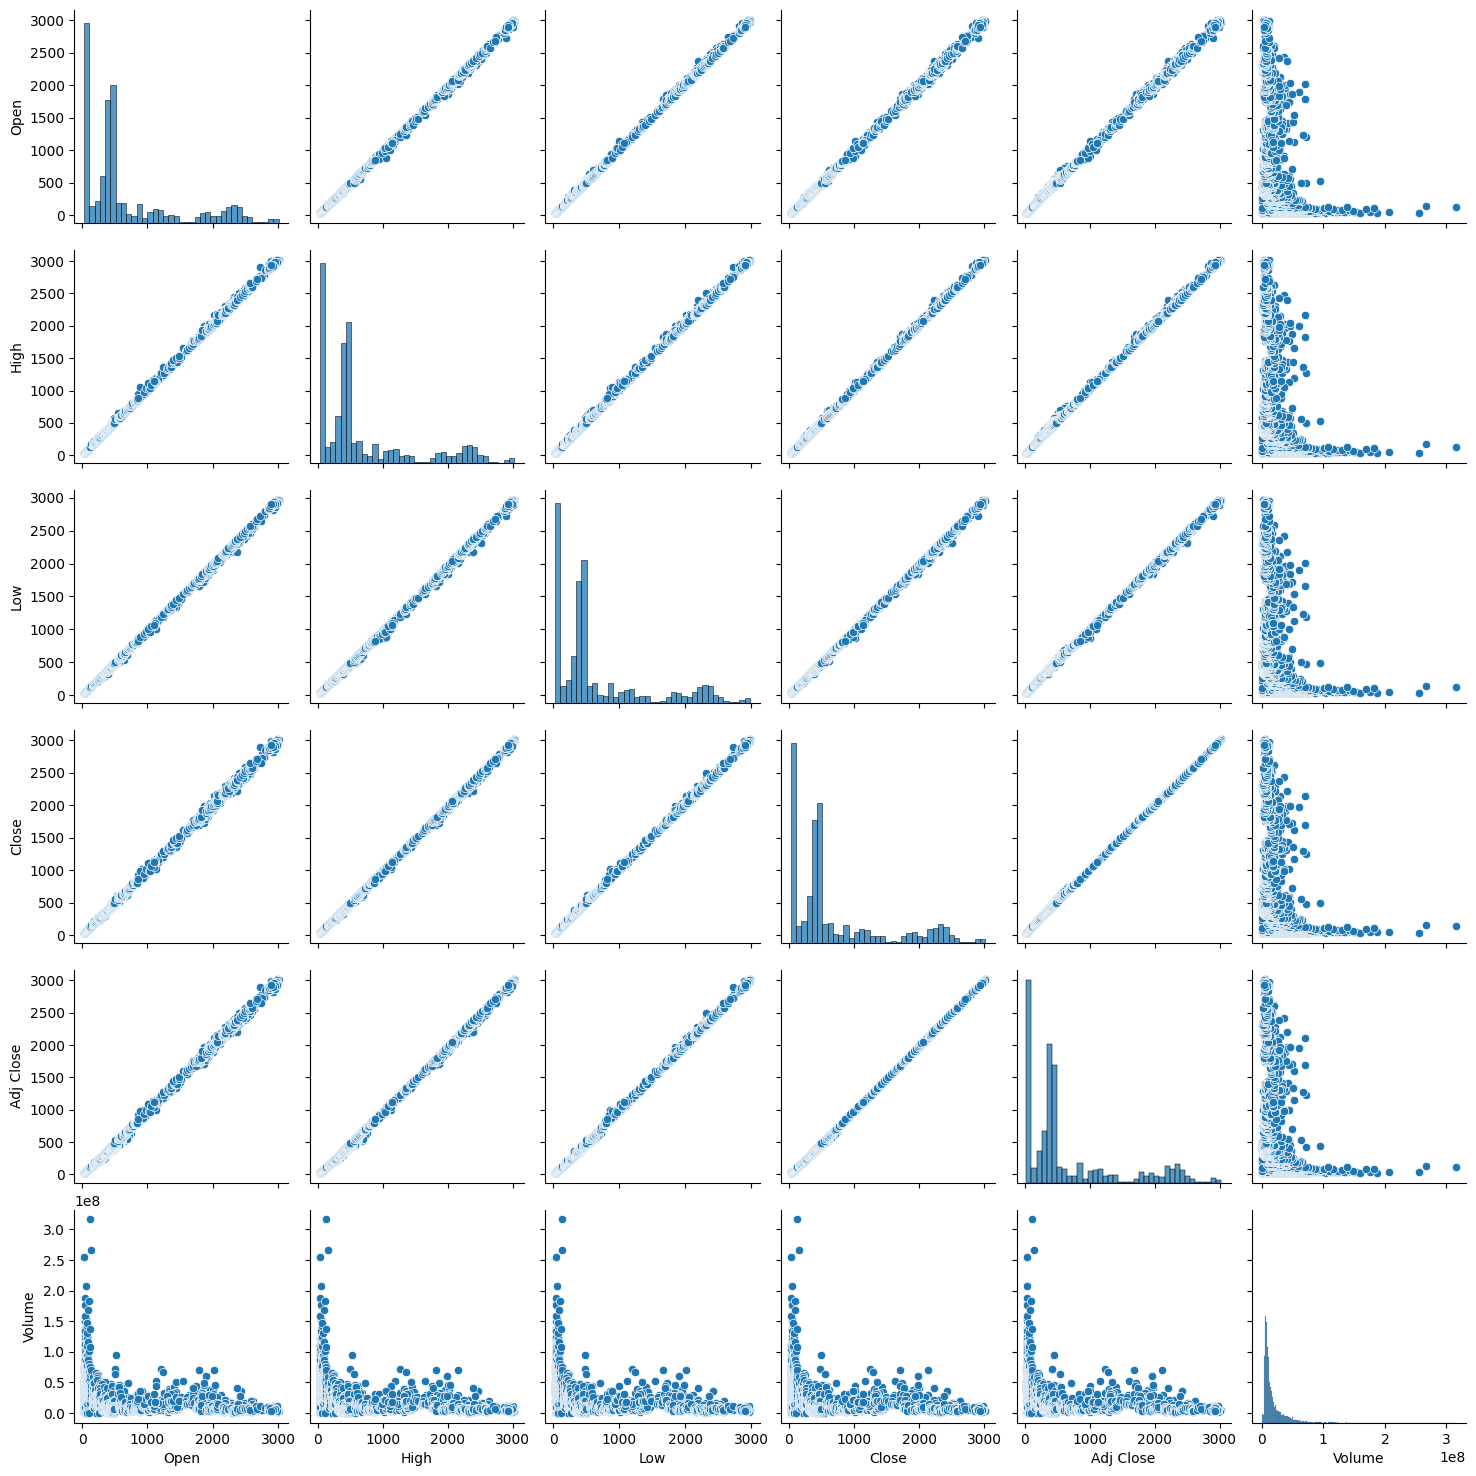

In [50]:
sns.pairplot(reliance_df)

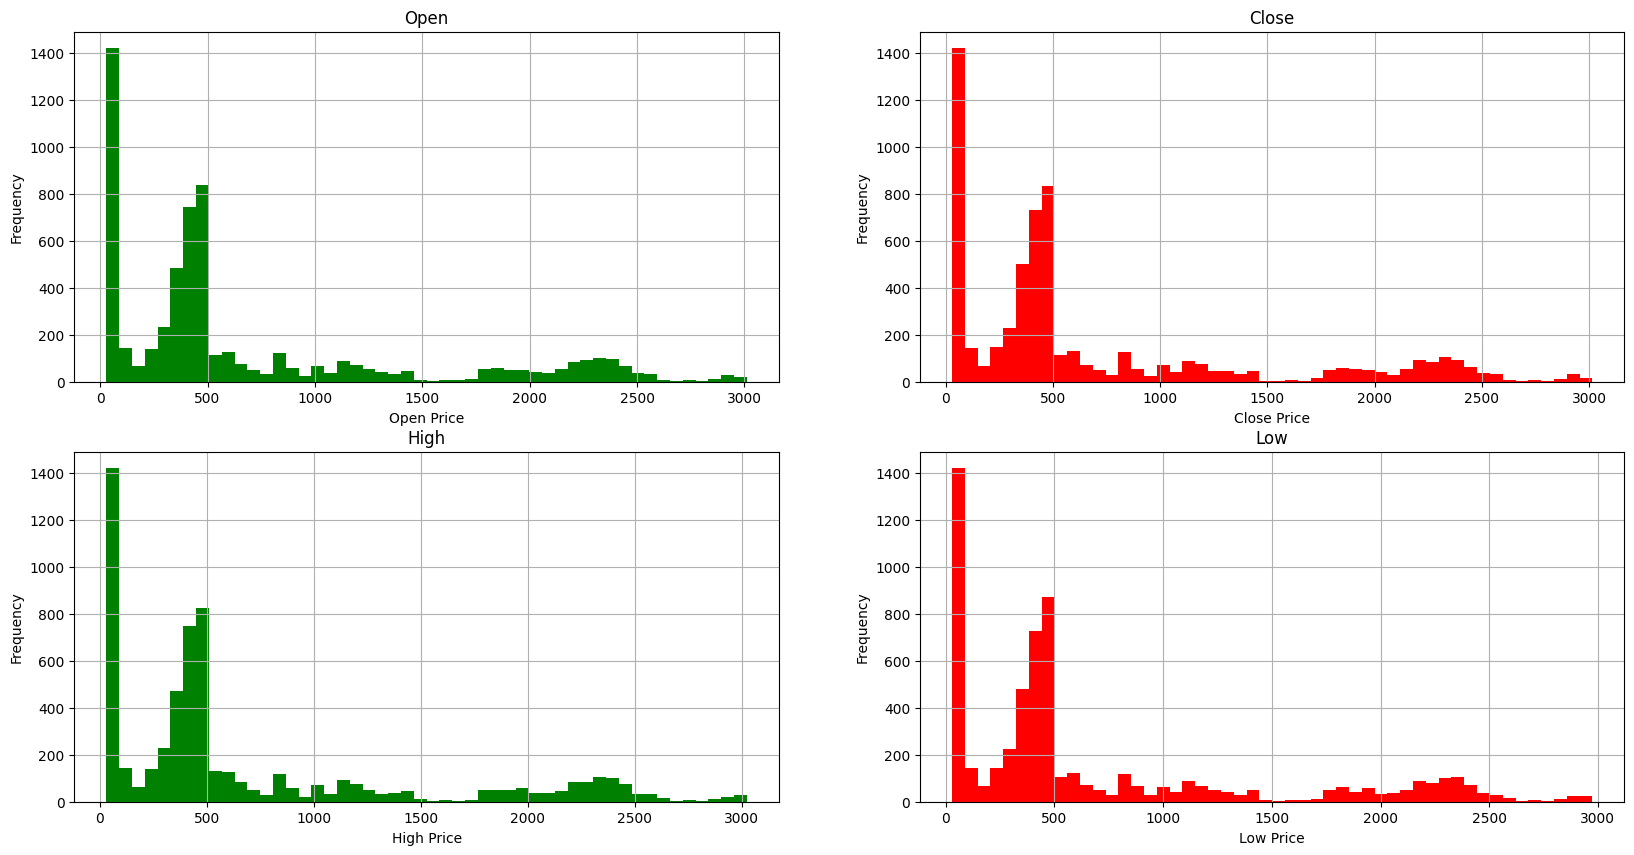

In [51]:
# Ploting Histogram
plt.figure(figsize=(20,10))
#Plot 1
plt.subplot(2,2,1)
plt.hist(reliance_df['Open'],bins=50, color='green')
plt.xlabel("Open Price")
plt.ylabel("Frequency")
plt.title('Open')
plt.grid()
#Plot 2
plt.subplot(2,2,2)
plt.hist(reliance_df['Close'],bins=50, color='red')
plt.xlabel("Close Price")
plt.ylabel("Frequency")
plt.title('Close')
plt.grid()
#Plot 3
plt.subplot(2,2,3)
plt.hist(reliance_df['High'],bins=50, color='green')
plt.xlabel("High Price")
plt.ylabel("Frequency")
plt.title('High')
plt.grid()
#Plot 4
plt.subplot(2,2,4)
plt.hist(reliance_df['Low'],bins=50, color='red')
plt.xlabel("Low Price")
plt.ylabel("Frequency")
plt.title('Low')
plt.grid()

Text(0.5, 1.0, 'Low')

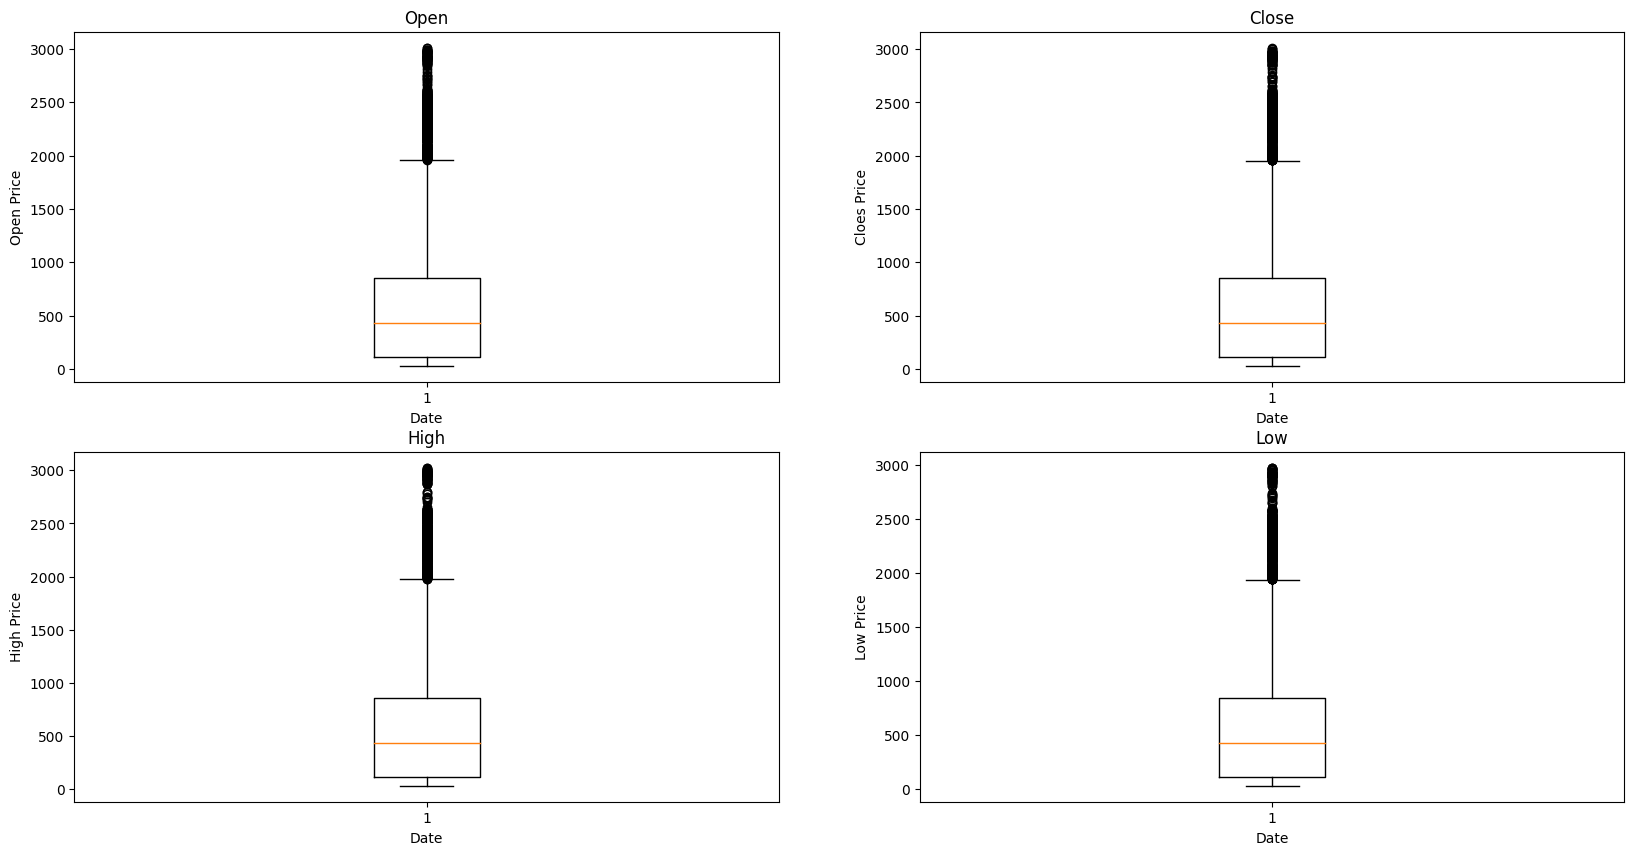

In [52]:
# Creating box-plots
plt.figure(figsize=(20,10))
#Plot 1
plt.subplot(2,2,1)
box1=plt.boxplot(reliance_df['Open'])
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.title('Open')
#Plot 2
plt.subplot(2,2,2)
box2=plt.boxplot(reliance_df['Close'])
plt.xlabel('Date')
plt.ylabel('Cloes Price')
plt.title('Close')
#Plot 3
plt.subplot(2,2,3)
box3=plt.boxplot(reliance_df['High'])
plt.xlabel('Date')
plt.ylabel('High Price')
plt.title('High')
#Plot 4
plt.subplot(2,2,4)
box4=plt.boxplot(reliance_df['Low'])
plt.xlabel('Date')
plt.ylabel('Low Price')
plt.title('Low')

In [53]:
box1

{'whiskers': [<matplotlib.lines.Line2D at 0x7eb070369600>,
 'caps': [<matplotlib.lines.Line2D at 0x7eb070369b40>,
 'boxes': [<matplotlib.lines.Line2D at 0x7eb070369360>],
 'medians': [<matplotlib.lines.Line2D at 0x7eb071391120>],
 'fliers': [<matplotlib.lines.Line2D at 0x7eb071391b70>],
 'means': []}

In [54]:
outliers=[item.get_ydata()for item in box1['fliers']] #fliers are outliers

In [55]:
np.sum(outliers)

1743658.329942

In [56]:
reliance_df.shape


(6069, 6)

<Axes: >

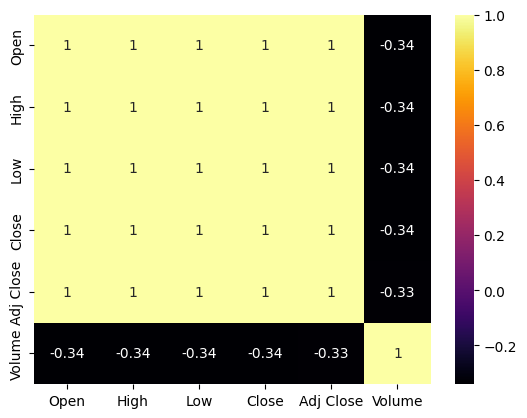

In [ ]:
#Heatmap & correlation analysis

sns.heatmap(reliance_df.corr(),annot=True,cmap='inferno')

In [32]:
cols=reliance_df.columns
cols

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

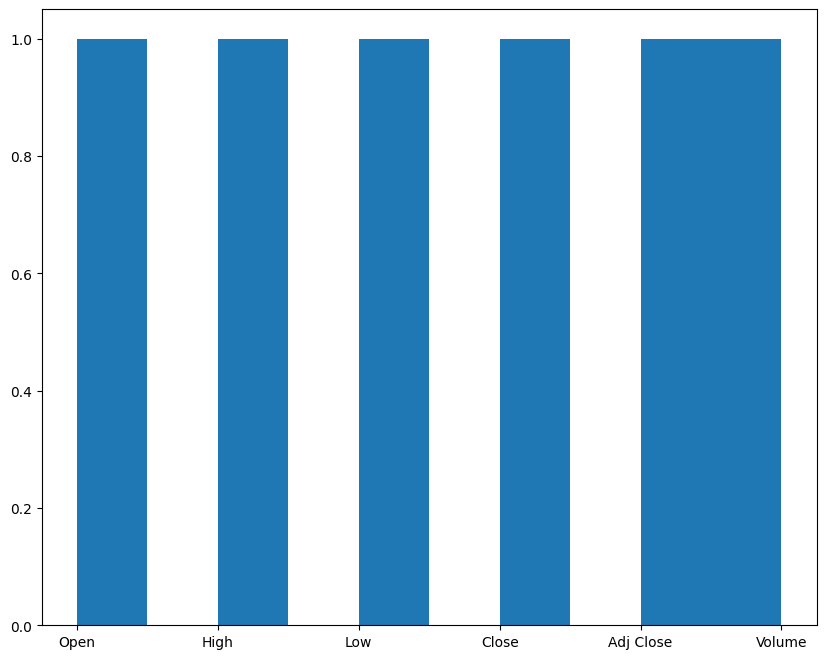

In [34]:
plt.figure(figsize=(10,8))
plt.hist(cols)
plt.show()

#Normalization

In [ ]:
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler=MinMaxScaler(feature_range=(0,1)) #creating instance of minmax scaler
rescaled=scaler.fit_transform(reliance_df)  #transforming the array

#Transformed data
set_printoptions(precision=5)
print(rescaled[0:5,:])


[[0.00153 0.00154 0.00196 0.00232 0.00172 0.0987 ]
 [0.00253 0.0025  0.00262 0.00328 0.00243 0.21014]
 [0.00245 0.00326 0.00288 0.00379 0.00281 0.59433]
 [0.004   0.00387 0.00445 0.00436 0.00323 0.34734]
 [0.00429 0.00469 0.00465 0.00533 0.00394 0.44012]]


In [ ]:
#Replacing the original values with Transformed scaled values
reliance_df.loc[:,:] = rescaled

In [ ]:
reliance_df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,0.001532,0.001536,0.001956,0.002320,0.001718,0.098704
2000-01-04,0.002533,0.002497,0.002625,0.003284,0.002432,0.210144
2000-01-05,0.002449,0.003263,0.002884,0.003793,0.002809,0.594332
2000-01-06,0.003999,0.003874,0.004452,0.004360,0.003228,0.347343
2000-01-07,0.004286,0.004694,0.004646,0.005326,0.003944,0.440117
...,...,...,...,...,...,...
2024-04-23,0.982043,0.987339,0.978498,0.967797,0.967878,0.023099
2024-04-24,0.971648,0.970670,0.974392,0.961668,0.961764,0.016547
2024-04-25,0.957565,0.970286,0.968961,0.968233,0.968312,0.025216
